<a href="https://colab.research.google.com/github/RamiroIsaJ/Hacking_Machine_Learning/blob/main/Hacking_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

path1 = '/content/drive/My Drive/features_dataset.csv'
path2 = '/content/drive/My Drive/features_attacks.csv'

dataset = pd.read_csv(path1)
attacks = pd.read_csv(path2)
print(dataset)

     Country  Tool          IP   Time
0         10     1  3044031371  47690
1         62    11  1138852174  82816
2         19     3  3036316420  78877
3          7    13  1822660260  10587
4         53     0  1850575299  65425
..       ...   ...         ...    ...
495       47     0  2342650456  48077
496       62     0  1097625585  76488
497       12     8   773773270  66838
498       16     0  2540336817  52035
499       62     6  2733718757  30690

[500 rows x 4 columns]


In [ ]:
# Procesado de los datos
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import  train_test_split
import numpy as np

scale = StandardScaler()
X_norm = scale.fit_transform(dataset)
# definir espacio muestral
encod = OneHotEncoder()
transformed = encod.fit_transform(attacks[['Id_attacks']])
Y = transformed.toarray()
print(Y.shape)

# Seleccion de datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.20, random_state=0)

(500, 7)


In [ ]:
# Generacion del modelo - Redes Neuronales
from tensorflow.keras import models, layers

model = models.Sequential()
# capa de entrada
model.add(layers.Dense(units=64, activation='sigmoid', input_shape=(4,)))
# Capa oculta
model.add(layers.Dense(units=128, activation='sigmoid'))
model.add(layers.Dense(units=64, activation='sigmoid'))
# capa de salida
model.add(layers.Dense(units=7, activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                320       
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 7)                 455       
                                                                 
Total params: 17,351
Trainable params: 17,351
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Entrenamiento
import time
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

tic = time.time()
model.fit(x_train, y_train, epochs=100, batch_size=16, shuffle=True,
          validation_split=0.2, verbose=2)
toc = time.time()
print(f'Tiempo de entrenamiento: { toc - tic}')

Epoch 1/100
20/20 - 1s - loss: 0.0543 - accuracy: 0.9875 - val_loss: 0.0564 - val_accuracy: 0.9875 - 846ms/epoch - 42ms/step
Epoch 2/100
20/20 - 0s - loss: 0.0513 - accuracy: 0.9875 - val_loss: 0.0549 - val_accuracy: 0.9875 - 82ms/epoch - 4ms/step
Epoch 3/100
20/20 - 0s - loss: 0.0496 - accuracy: 0.9875 - val_loss: 0.0510 - val_accuracy: 0.9875 - 89ms/epoch - 4ms/step
Epoch 4/100
20/20 - 0s - loss: 0.0453 - accuracy: 0.9875 - val_loss: 0.0577 - val_accuracy: 0.9875 - 78ms/epoch - 4ms/step
Epoch 5/100
20/20 - 0s - loss: 0.0491 - accuracy: 0.9875 - val_loss: 0.0599 - val_accuracy: 0.9875 - 69ms/epoch - 3ms/step
Epoch 6/100
20/20 - 0s - loss: 0.0480 - accuracy: 0.9875 - val_loss: 0.0517 - val_accuracy: 0.9875 - 81ms/epoch - 4ms/step
Epoch 7/100
20/20 - 0s - loss: 0.0479 - accuracy: 0.9875 - val_loss: 0.0514 - val_accuracy: 0.9875 - 67ms/epoch - 3ms/step
Epoch 8/100
20/20 - 0s - loss: 0.0478 - accuracy: 0.9875 - val_loss: 0.0557 - val_accuracy: 0.9875 - 66ms/epoch - 3ms/step
Epoch 9/100
20

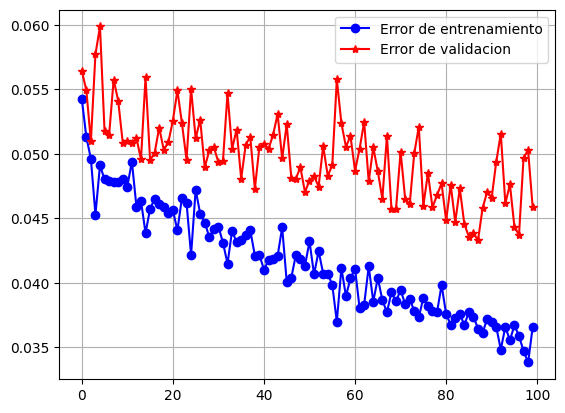

In [ ]:
import matplotlib.pyplot as plt

loss_train = model.history.history['loss']
loss_valid = model.history.history['val_loss']

plt.plot(loss_train, 'o-b', label='Error de entrenamiento')
plt.plot(loss_valid, '*-r', label='Error de validacion')
plt.legend()
plt.grid()

In [ ]:
# Predecir con el modelo los datos de entrenamiento
y_train_predict = model.predict(x_train).squeeze()
y_label_pred = np.argmax(y_train_predict, 1)
y_label_test = np.argmax(y_train, 1)

13/13 [==============================] - 0s 2ms/step


                            precision    recall  f1-score   support

       BRUTE FORCE ATTACKS       0.93      1.00      0.96        41
         COMMAND INJECTION       1.00      1.00      1.00        31
CROSS-SITE SCRIPTING (XSS)       1.00      1.00      1.00        47
               DDOS ATTACK       1.00      1.00      1.00       157
                DEFACEMENT       1.00      1.00      1.00        25
             SQL INJECTION       1.00      1.00      1.00        79
     THE MAN IN THE MIDDLE       1.00      0.85      0.92        20

                  accuracy                           0.99       400
                 macro avg       0.99      0.98      0.98       400
              weighted avg       0.99      0.99      0.99       400



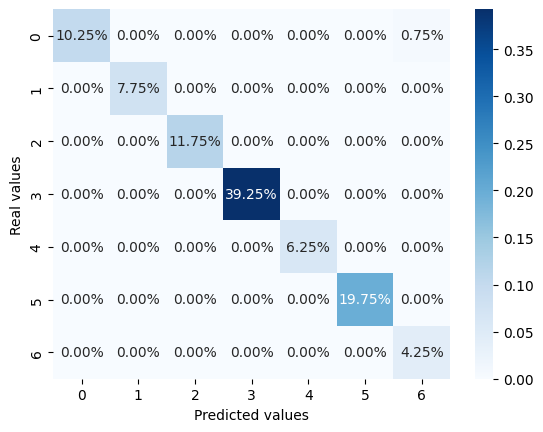

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sb

matriz = confusion_matrix(y_label_pred, y_label_test)
ax = sb.heatmap(matriz/np.sum(matriz), annot=True, fmt='.2%', cmap='Blues')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Real values')

# clasification report
target_names = ['BRUTE FORCE ATTACKS', 'COMMAND INJECTION',
                'CROSS-SITE SCRIPTING (XSS)', 'DDOS ATTACK', 'DEFACEMENT',
                'SQL INJECTION', 'THE MAN IN THE MIDDLE']
print(classification_report(y_label_test, y_label_pred, target_names=target_names))

4/4 [==============================] - 0s 3ms/step
                            precision    recall  f1-score   support

       BRUTE FORCE ATTACKS       0.91      1.00      0.95        10
         COMMAND INJECTION       1.00      1.00      1.00         5
CROSS-SITE SCRIPTING (XSS)       1.00      1.00      1.00        12
               DDOS ATTACK       1.00      1.00      1.00        38
                DEFACEMENT       0.67      1.00      0.80         2
             SQL INJECTION       1.00      1.00      1.00        25
     THE MAN IN THE MIDDLE       1.00      0.75      0.86         8

                  accuracy                           0.98       100
                 macro avg       0.94      0.96      0.94       100
              weighted avg       0.98      0.98      0.98       100



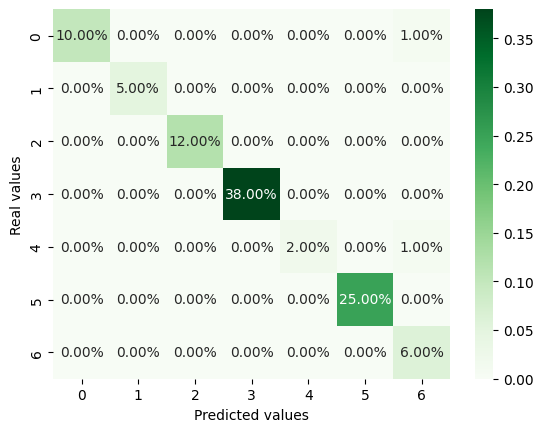

In [ ]:
# Predecir con el modelo los datos de test
y_test_predict = model.predict(x_test).squeeze()
y_label_pred = np.argmax(y_test_predict, 1)
y_label_test = np.argmax(y_test, 1)

matriz = confusion_matrix(y_label_pred, y_label_test)
ax = sb.heatmap(matriz/np.sum(matriz), annot=True, fmt='.2%', cmap='Greens')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Real values')

# clasification report
target_names = ['BRUTE FORCE ATTACKS', 'COMMAND INJECTION',
                'CROSS-SITE SCRIPTING (XSS)', 'DDOS ATTACK', 'DEFACEMENT',
                'SQL INJECTION', 'THE MAN IN THE MIDDLE']
print(classification_report(y_label_test, y_label_pred, target_names=target_names))

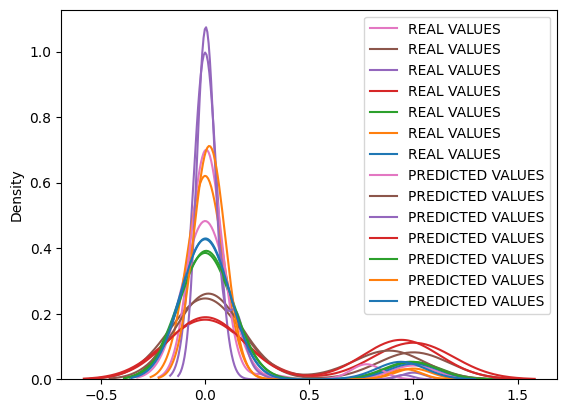

In [ ]:
ax = sb.kdeplot(y_test, color='r', label='REAL VALUES')
sb.kdeplot(y_test_predict, color='b', label='PREDICTED VALUES', ax=ax)
plt.legend()

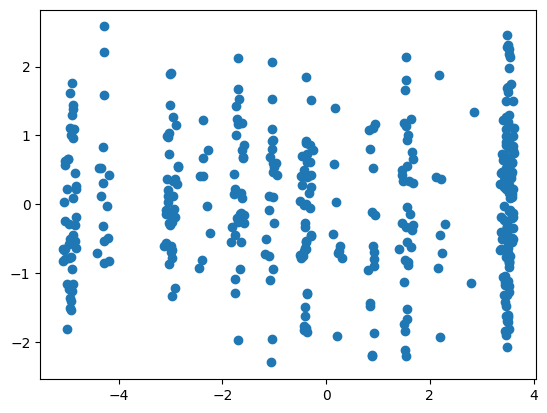

In [ ]:
# LDA para reduccion de dimensionalidad
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

Y = attacks['Id_attacks']
x_train, x_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=0)

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(x_train, y_train)
X_test_lda = lda.transform(x_test)

plt.plot(X_train_lda[:, 0], X_train_lda[:, 1], 'o')

In [ ]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=0)
model1.fit(X_train_lda, y_train)

LogisticRegression(random_state=0)

[0 3 5 5 5 6 3 0 2 3 3 3 2 0 3 0 5 0 5 3 5 2 2 3 3 2 3 5 3 2 5 5 5 3 3 5 3
 3 5 5 3 5 0 3 3 3 3 2 5 3 3 3 2 3 3 3 2 3 5 3 2 3 3 3 5 2 3 5 0 5 2 3 3 3
 3 3 5 3 5 0 6 5 3 3 5 0 2 2 3 3 5 5 0 3 2 3 3 3 5 3 5 3 1 2 5 5 3 5 3 3 0
 0 5 5 3 5 3 5 3 2 5 0 3 3 5 3 5 3 5 5 3 3 5 0 3 2 3 2 2 3 5 2 5 3 2 5 5 0
 3 5 0 3 5 5 0 0 2 2 3 5 2 0 3 3 3 3 3 5 2 5 0 3 3 3 0 3 3 3 2 0 3 5 3 2 3
 5 3 3 5 0 2 2 3 5 5 3 3 5 3 3 5 3 0 2 5 2 3 5 2 5 3 0 3 5 3 3 0 0 3 5 0 2
 3 3 3 2 3 3 0 3 5 2 2 2 5 3 3 5 3 5 0 5 5 2 5 3 2 3 4 5 3 2 0 2 3 0 0 3 3
 3 2 2 3 3 0 3 5 0 3 2 5 5 3 3 3 5 5 3 5 0 3 5 3 0 3 3 0 2 3 3 5 3 2 3 3 3
 3 0 5 2 3 2 3 3 3 3 0 3 5 3 2 5 5 5 0 2 2 3 3 3 2 3 0 3 3 3 4 3 6 5 2 3 3
 3 3 0 5 3 3 3 0 3 0 5 5 2 3 0 6 5 5 3 5 3 5 3 5 5 3 3 3 3 0 3 3 5 2 2 3 0
 3 3 3 0 5 5 3 3 3 0 5 3 3 2 0 3 0 3 3 3 5 5 2 0 5 5 3 5 6 3]
400
90     3
254    5
283    0
445    5
461    5
      ..
372    3
56     5
440    6
60     1
208    3
Name: Id_attacks, Length: 100, dtype: int64


Text(50.722222222222214, 0.5, 'Real values')

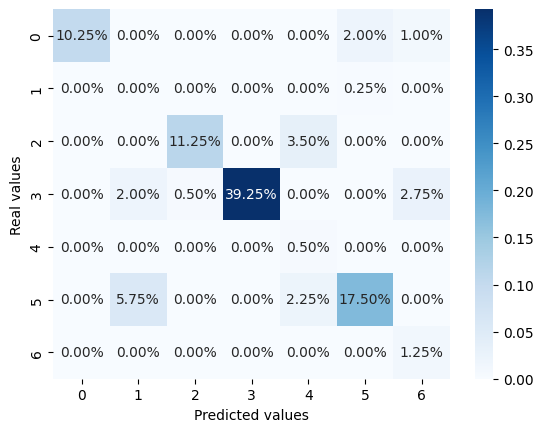

In [ ]:
# predicir valores
y_test_predict = model1.predict(X_train_lda)
print(y_test_predict)
print(len(y_test_predict))
print(y_test)

matriz = confusion_matrix(y_test_predict, y_train)
ax = sb.heatmap(matriz/np.sum(matriz), annot=True, fmt='.2%', cmap='Blues')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Real values')

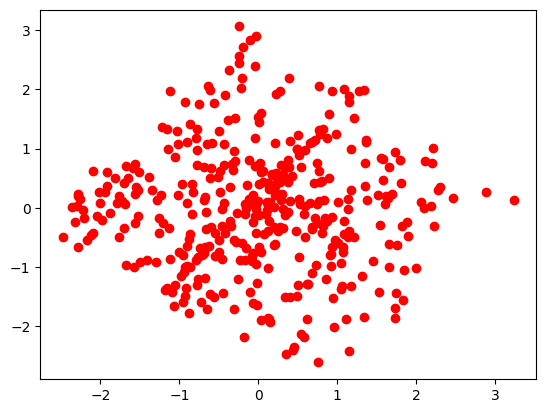

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train, y_train)
X_test_pca = pca.transform(x_test)

plt.plot(X_train_pca[:, 0], X_train_pca[:, 1], 'or')

[5 0 5 0 0 0 0 3 0 0 5 5 3 3 0 5 0 5 0 0 5 3 5 5 3 5 5 1 0 0 5 5 0 0 0 3 0
 5 0 5 1 0 0 3 5 3 5 0 5 5 5 0 0 0 0 1 5 3 5 0 5 0 0 3 0 1 5 3 0 0 3 1 3 0
 0 3 0 0 3 0 0 0 0 0 0 0 5 3 0 5 0 5 3 0 0 0 3 5 3 5]
100
90     3
254    5
283    0
445    5
461    5
      ..
372    3
56     5
440    6
60     1
208    3
Name: Id_attacks, Length: 100, dtype: int64


Text(50.722222222222214, 0.5, 'Real values')

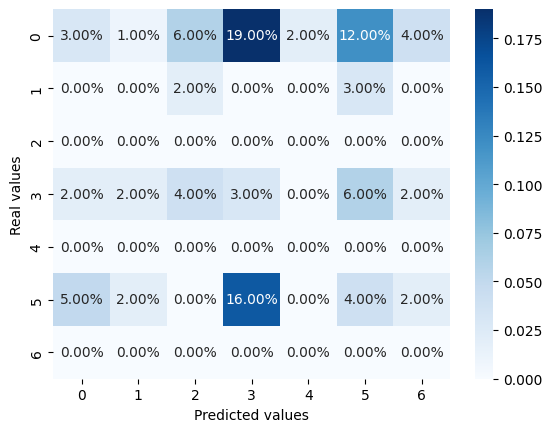

In [ ]:
# predicir valores
y_test_predict = model1.predict(X_test_pca)
print(y_test_predict)
print(len(y_test_predict))
print(y_test)

matriz = confusion_matrix(y_test_predict, y_test)
ax = sb.heatmap(matriz/np.sum(matriz), annot=True, fmt='.2%', cmap='Blues')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Real values')

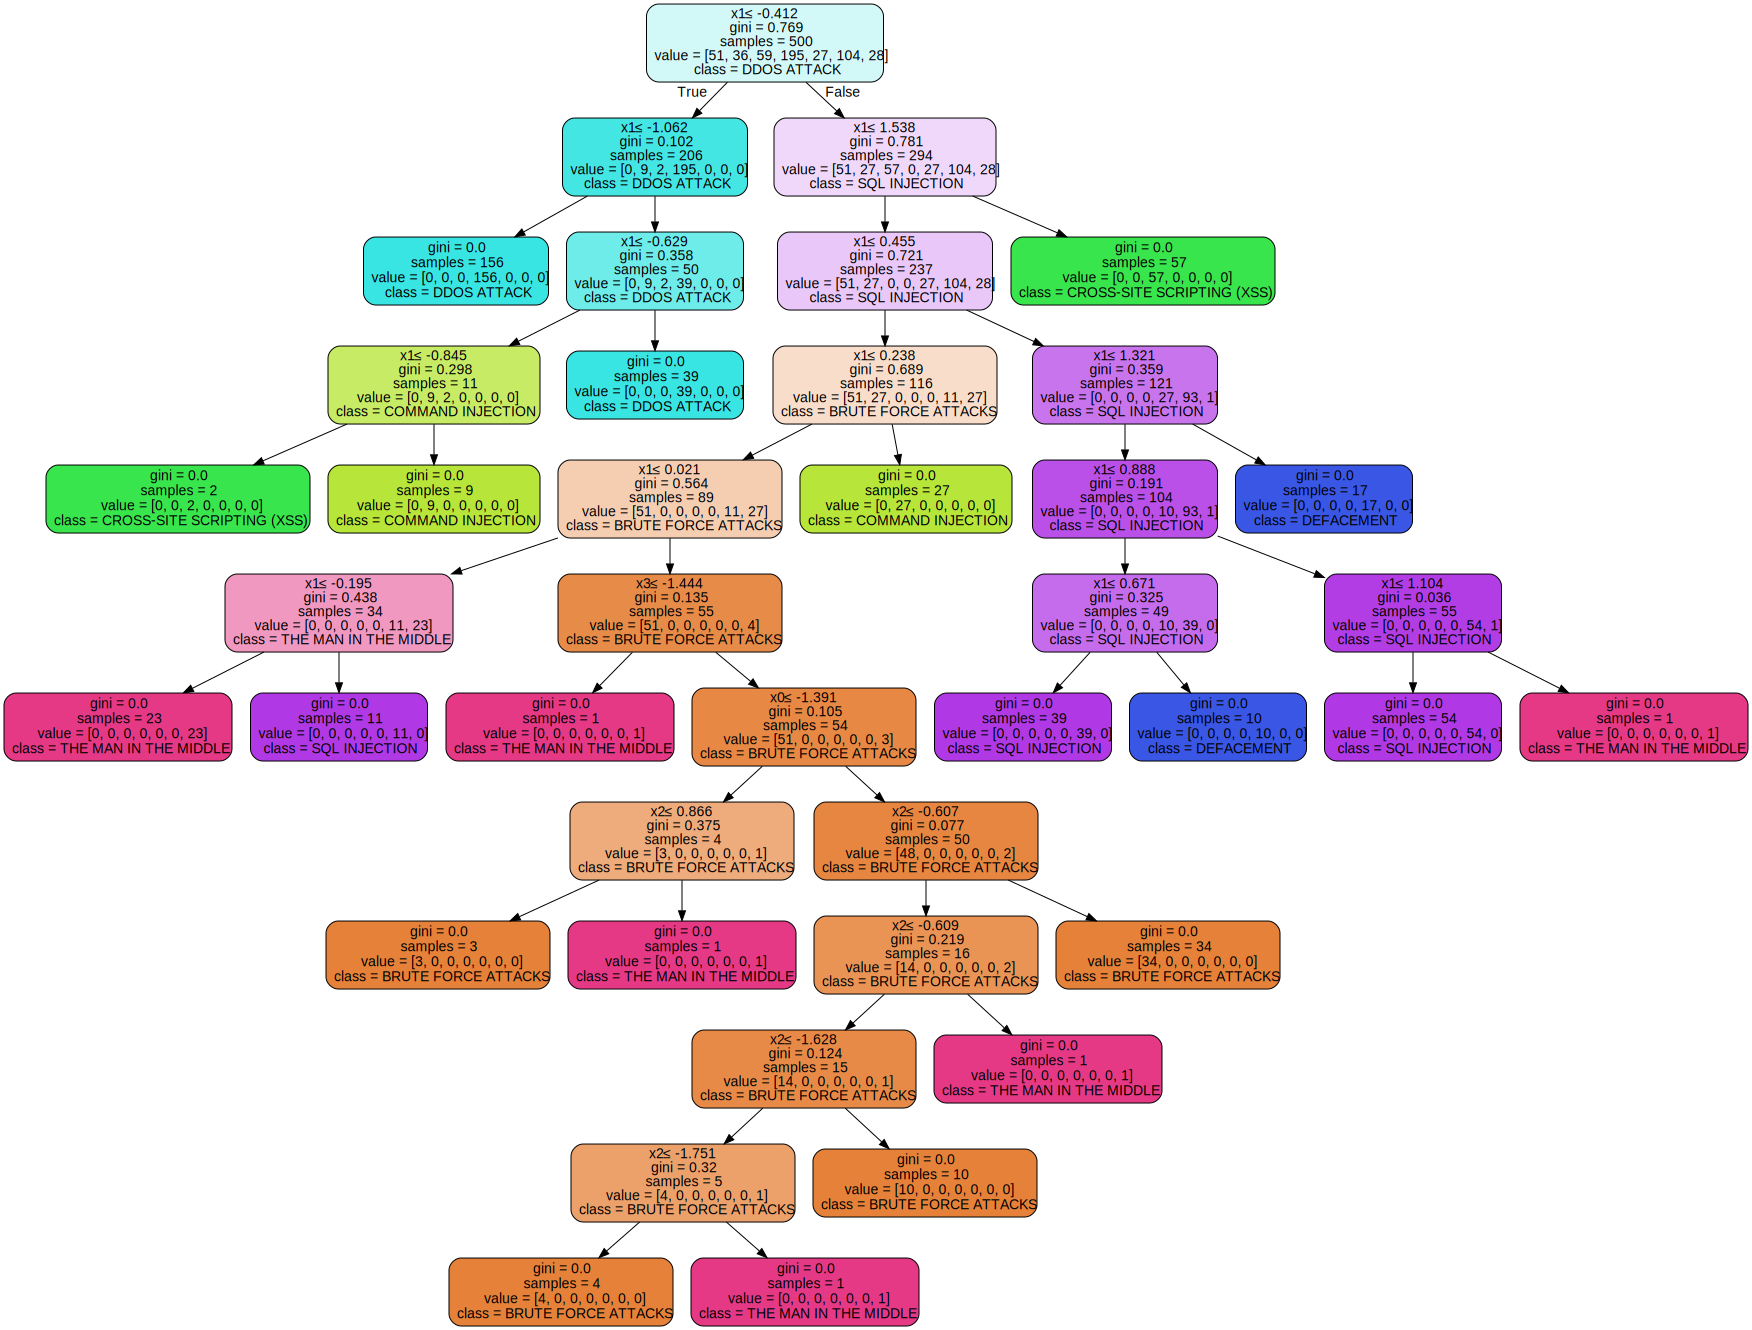

In [ ]:
from sklearn import tree

path_f = '/content/drive/My Drive/ATTACK.txt'
file = open(path_f, "r")
data = file.read()
target_names = data.split("\n")
file.close()
target_names = np.array(target_names)

X, y = X_norm, attacks['Id_attacks']

model = tree.DecisionTreeClassifier()
model.fit(X, y)

import graphviz
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Hacking")
dot_data = tree.export_graphviz(model, out_file=None,
                                filled=True, rounded=True,
                                class_names=target_names,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = RandomForestClassifier(max_depth=150, random_state=0)
clf.fit(x_train, y_train)



RandomForestClassifier(max_depth=150, random_state=0)

                            precision    recall  f1-score   support

       BRUTE FORCE ATTACKS       1.00      1.00      1.00        41
         COMMAND INJECTION       1.00      1.00      1.00        31
CROSS-SITE SCRIPTING (XSS)       1.00      1.00      1.00        47
               DDOS ATTACK       1.00      1.00      1.00       157
                DEFACEMENT       1.00      1.00      1.00        25
             SQL INJECTION       1.00      1.00      1.00        79
     THE MAN IN THE MIDDLE       1.00      1.00      1.00        20

                  accuracy                           1.00       400
                 macro avg       1.00      1.00      1.00       400
              weighted avg       1.00      1.00      1.00       400



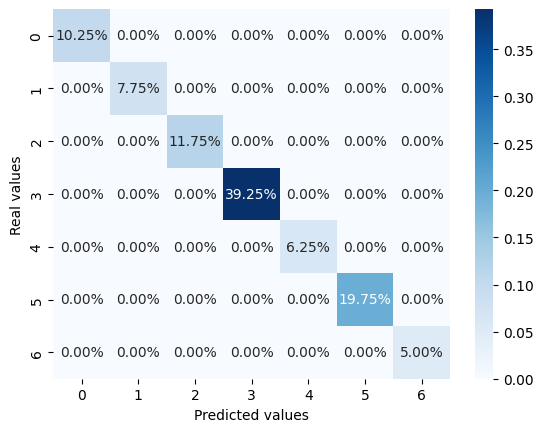

In [ ]:
# predicir valores
y_train_predict = clf.predict(x_train).squeeze()
y_label_pred = np.argmax(y_train_predict, 1)
y_label_test = np.argmax(y_train, 1)

matriz = confusion_matrix(y_label_pred, y_label_test)
ax = sb.heatmap(matriz/np.sum(matriz), annot=True, fmt='.2%', cmap='Blues')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Real values')

# clasification report
target_names = ['BRUTE FORCE ATTACKS', 'COMMAND INJECTION',
                'CROSS-SITE SCRIPTING (XSS)', 'DDOS ATTACK', 'DEFACEMENT',
                'SQL INJECTION', 'THE MAN IN THE MIDDLE']
print(classification_report(y_label_test, y_label_pred, target_names=target_names))

4/4 [==============================] - 0s 2ms/step
                            precision    recall  f1-score   support

       BRUTE FORCE ATTACKS       0.91      1.00      0.95        10
         COMMAND INJECTION       1.00      1.00      1.00         5
CROSS-SITE SCRIPTING (XSS)       1.00      1.00      1.00        12
               DDOS ATTACK       1.00      1.00      1.00        38
                DEFACEMENT       0.67      1.00      0.80         2
             SQL INJECTION       1.00      1.00      1.00        25
     THE MAN IN THE MIDDLE       1.00      0.75      0.86         8

                  accuracy                           0.98       100
                 macro avg       0.94      0.96      0.94       100
              weighted avg       0.98      0.98      0.98       100



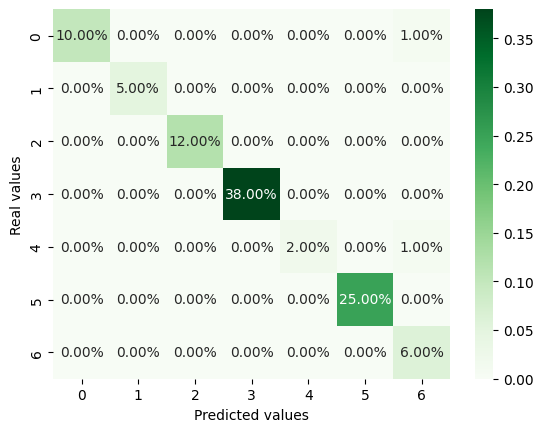

In [ ]:
# Predecir con el modelo los datos de test
y_test_predict = model.predict(x_test).squeeze()
y_label_pred = np.argmax(y_test_predict, 1)
y_label_test = np.argmax(y_test, 1)

matriz = confusion_matrix(y_label_pred, y_label_test)
ax = sb.heatmap(matriz/np.sum(matriz), annot=True, fmt='.2%', cmap='Greens')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Real values')

# clasification report
target_names = ['BRUTE FORCE ATTACKS', 'COMMAND INJECTION',
                'CROSS-SITE SCRIPTING (XSS)', 'DDOS ATTACK', 'DEFACEMENT',
                'SQL INJECTION', 'THE MAN IN THE MIDDLE']
print(classification_report(y_label_test, y_label_pred, target_names=target_names))

In [ ]:
# Test de personalidad
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import  train_test_split
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

path2 = '/content/drive/My Drive/features_attacks.csv'
path3 = '/content/drive/My Drive/features_emotions.csv'

attacks = pd.read_csv(path2)
emotions = pd.read_csv(path3)

scale = StandardScaler()
X_norm = scale.fit_transform(emotions)
y = attacks['Id_attacks']

x_train, x_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=0)

clf_e = RandomForestClassifier(max_depth=250, random_state=0)
clf_e.fit(x_train, y_train)


RandomForestClassifier(max_depth=250, random_state=0)

Text(0, 0.5, 'PROGRESSION')

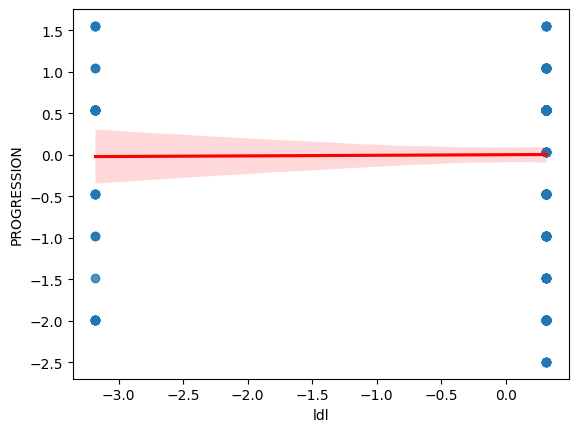

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.DataFrame(X_norm, columns=['Personality', 'Trait', 'Motivation', 'Country', 'Tool', 'Time'])
sb.regplot(data=data, x='Trait', y='Motivation', line_kws={'color': 'red'})
plt.xlabel('ldl')
plt.ylabel('PROGRESSION')

<Axes: >

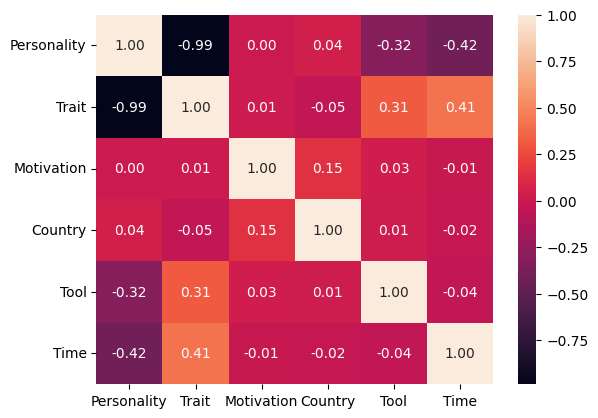

In [ ]:
sb.heatmap(data.corr(), annot=True, fmt='.2f')

                            precision    recall  f1-score   support

       BRUTE FORCE ATTACKS       1.00      1.00      1.00        41
         COMMAND INJECTION       1.00      1.00      1.00        31
CROSS-SITE SCRIPTING (XSS)       1.00      1.00      1.00        47
               DDOS ATTACK       1.00      1.00      1.00       157
                DEFACEMENT       1.00      1.00      1.00        25
             SQL INJECTION       1.00      1.00      1.00        79
     THE MAN IN THE MIDDLE       1.00      1.00      1.00        20

                  accuracy                           1.00       400
                 macro avg       1.00      1.00      1.00       400
              weighted avg       1.00      1.00      1.00       400



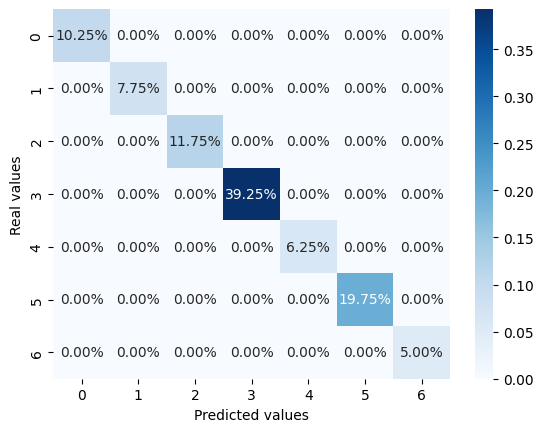

In [ ]:
# predicir valores
from sklearn.metrics import confusion_matrix, classification_report

# predicir valores
y_train_predict = clf_e.predict(x_train).squeeze()

matriz = confusion_matrix(y_train_predict, y_train)
ax = sb.heatmap(matriz/np.sum(matriz), annot=True, fmt='.2%', cmap='Blues')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Real values')

# clasification report
target_names = ['BRUTE FORCE ATTACKS', 'COMMAND INJECTION',
                'CROSS-SITE SCRIPTING (XSS)', 'DDOS ATTACK', 'DEFACEMENT',
                'SQL INJECTION', 'THE MAN IN THE MIDDLE']
print(classification_report(y_train_predict, y_train, target_names=target_names))

                            precision    recall  f1-score   support

       BRUTE FORCE ATTACKS       0.90      0.82      0.86        11
         COMMAND INJECTION       0.80      0.80      0.80         5
CROSS-SITE SCRIPTING (XSS)       1.00      0.92      0.96        13
               DDOS ATTACK       1.00      1.00      1.00        38
                DEFACEMENT       0.50      0.50      0.50         2
             SQL INJECTION       0.96      0.92      0.94        26
     THE MAN IN THE MIDDLE       0.62      1.00      0.77         5

                  accuracy                           0.93       100
                 macro avg       0.83      0.85      0.83       100
              weighted avg       0.94      0.93      0.93       100



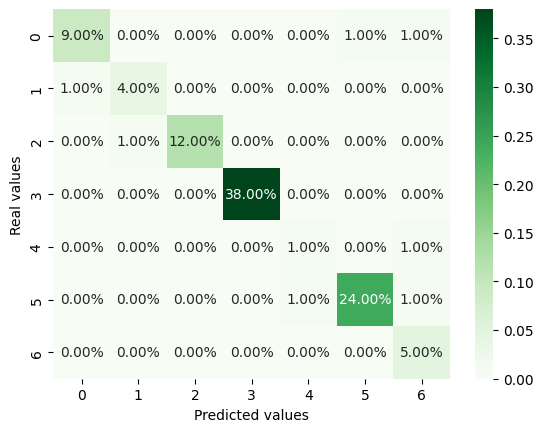

In [ ]:
y_test_predict = clf_e.predict(x_test)

matriz = confusion_matrix(y_test_predict, y_test)
ax = sb.heatmap(matriz/np.sum(matriz), annot=True, fmt='.2%', cmap='Greens')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Real values')

# clasification report
target_names = ['BRUTE FORCE ATTACKS', 'COMMAND INJECTION',
                'CROSS-SITE SCRIPTING (XSS)', 'DDOS ATTACK', 'DEFACEMENT',
                'SQL INJECTION', 'THE MAN IN THE MIDDLE']
print(classification_report(y_test_predict, y_test, target_names=target_names))

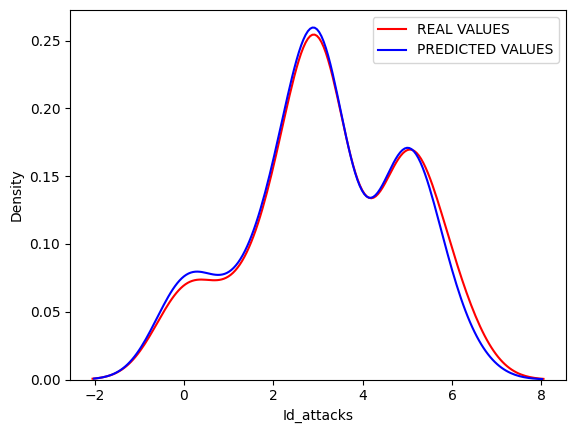

In [ ]:
ax = sb.kdeplot(y_test, color='r', label='REAL VALUES')
sb.kdeplot(y_test_predict, color='b', label='PREDICTED VALUES', ax=ax)
plt.legend()